<a href="https://colab.research.google.com/github/rosacarla/rede-neural-MLP-S2/blob/main/Rede_Neural_MLP_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TESTE DE REDE NEURAL MLP (MULTI-LAYER PERCEPTRON)**
CURSO: INTELIGÊNCIA ARTIFICIAL APLICADA  
DISCIPLINA: REDES NEURAIS  
PROFESSOR: Edson Ruschel (autor do código original MLP_S2.py)  
OBJETIVO: a rede deve identificar números escritos (ou desenhados) manualmente por seres humanos em tarefa de visão computacional  
ESTUDANTE: Carla Edila Silveira  
DATA: 08/09/2023

<img src='https://machinelearninggeek.com/wp-content/uploads/2021/03/Multi-Layer-Perceptron-Neural-Network-using-Python-800x445.jpg' width=80% height=50%>

In [702]:
# IMPORTAÇÃO DE BIBLIOTECAS
import matplotlib.pyplot as plt  # Necessario instalar matplotlib (Spyder, pip)
import numpy as np
import tensorflow as tf  # Necessario atualizar devido conflito em metricas
from keras.src.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow._api.v2 as tf  # Necessario para para ajustar o compat
import tensorflow.compat.v2 as tf # Necessario por erro de execução no Spyder
from tensorflow.keras import Sequential

In [703]:
# CRIAÇÃO DO MODELO MLP

model = Sequential()

In [704]:
# DEFINIÇÃO DA QUANTIDADE DE NEURÔNIOS DAS CAMADAS

# Quantidade de neurônios da Camada Oculta 1
n1 = 10

# Quantidade de neurônios da Camada de Saída
ns = 10

In [705]:
# DEFINIÇÃO DAS FUNÇÕES DE ATIVAÇÃO
    # relu    -> Rectified Linear Unit (Unidade Linear Retificada)
    # sigmoid -> sigmoid(x) = 1 / (1 + exp(-x))
    # tanh    -> Tangente hiperbólica
    # softmax -> Utilizada na camada de saída

# Função de Ativação da Camada Oculta 1
fa1 = 'tanh'

# Função de Ativação da Camada de Saída
fas = 'softmax'

In [706]:
# ADIÇÃO DE CAMADAS À REDE NEURAL

# Primeira Camada Oculta (o input_dim é a própria camada de entrada)
model.add(Dense(units=n1, activation=fa1, input_dim=784))

# Camada de Saída
model.add(Dense(units=ns, activation=fas))

In [707]:
# DEFINIÇÃO DA FUNÇÃO DE PERDA
    # mean_squared_error       -> Erro quadrático médio.
    # binary_crossentropy      -> Entropia cruzada binária.
    # categorical_crossentropy -> Entropia cruzada categórica.
    # mean_absolute_error      -> Erro absoluto médio.

fp = 'mean_absolute_error'

In [708]:
# DEFINIÇÃO DO OTIMIZADOR
    # sgd     -> Descida de gradiente estocástico (SGD).
    # adam    -> SGD com adaptação de taxa de aprendizado.
    # rmsprop -> Baseado em Root Mean Square Propagation.
    # adagrad -> Adapta a taxa de aprendizado para cada parâmetro.

otimizador = 'adam'

### 🧠 DEFINIÇÃO DAS MÉTRICAS
    # accuracy            -> Acurácia.
    # precision           -> Precisão.
    # recall              -> Revocação.
    # f1-score            -> Pontuação F1.
    # mean_squared_error  -> Erro quadrático médio.
    # mean_absolute_error -> Erro absoluto médio.



In [709]:
# custom_metric = 'accuracy'

❗<b>OBSERVAÇÃO:</b> Essa métrica foi renomeada para tratar conflito entre nomes de métricas de acurácia padrão Keras;
como não resolveu o erro, então a solução foi retirá-la do código.

In [710]:
# COMPILAÇÃO DO MODELO

model.compile(loss=fp, optimizer=otimizador, metrics=['accuracy'])
# adicionada metrica de acuracia do padrao Keras para eliminar conflito
# model.compile(loss=fp, optimizer=otimizador, metrics=[custom_metric])

In [711]:
# CARREGAMENTO DOS DADOS DE TREINAMENTO E TESTE

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [712]:
# PRÉ-PROCESSAMENTO DOS DADOS

# Redimensionar as imagens para um vetor unidimensional
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Converter para tipo float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train /= 255.0
x_test /= 255.0

In [713]:
# TRANSFORMAÇÃO DOS RÓTULOS EM CODIFICAÇÃO ONE-HOT

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [714]:
# DEFINIÇÃO DO PERCENTUAL DO CONJUNTO DE DADOS DE TESTE

dados_teste = 0.90 # 0.90 significa 90% para teste e 10% para treinamento

In [715]:
# DIVISÃO DOS DADOS EM CONJUNTOS DE TREINAMENTO E TESTE

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=dados_teste, random_state=42)

In [716]:
# DEFINIÇÃO DO NÚMERO DE ÉPOCAS E NÚMERO DE AMOSTRAS

epocas = 2
amostras = 256

In [717]:
# TREINAMENTO DA REDE NEURAL MLP

model.fit(x_train, y_train, epochs = epocas, batch_size = amostras)

Epoch 1/2
24/24 [==============================] - 1s 3ms/step - loss: 0.1720 - accuracy: 0.3405
Epoch 2/2
24/24 [==============================] - 0s 3ms/step - loss: 0.1500 - accuracy: 0.6317


In [718]:
# AVALIAÇÃO DO MODELO (PERDA E ACURÁCIA)

loss, accuracy = model.evaluate(x_test, y_test)

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1399 - accuracy: 0.6443


In [719]:
# REALIZAÇÃO DE PREVISÕES COM DADOS ORIGINAIS

predictions = model.predict(x_test)

1688/1688 [==============================] - 3s 2ms/step


In [720]:
# SELEÇÃO DO NÚMERO DE AMOSTRAS PARA TESTE

# Selecione valores maiores que zero para testar
amostras_previsao = 20

# Sorteio de amostras de acordo com o número de amostras (amostras_previsao)
samples = np.random.choice(len(x_test), amostras_previsao)
idx=0

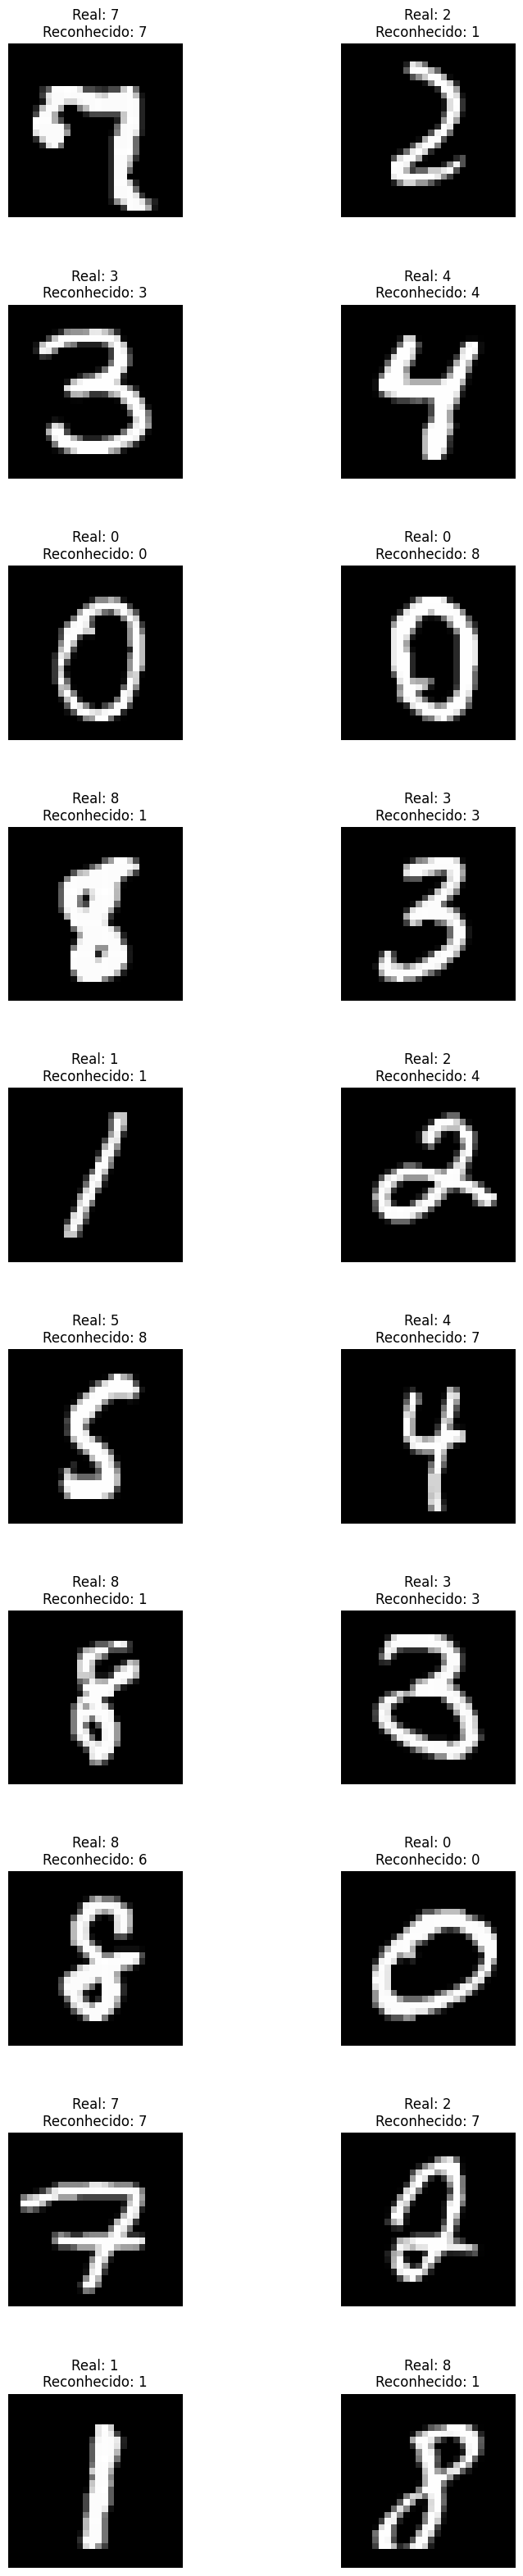

In [721]:
# EXIBIÇÃO DAS IMAGENS E PREVISÕES CORRESPONDENTES

# Número de colunas que deseja exibir
num_colunas = 2

# Número de amostras que deseja exibir
amostras_previsao = 20

# Sorteie amostras de acordo com o número de amostras (amostras_previsao)
samples = np.random.choice(len(x_test), amostras_previsao)

# Tamanho das figuras (6 cm de altura e 3 cm de largura)
figsize = (5, 4)

# Espaçamento entre as colunas
hspace = 0.1

# Crie uma figura com subplots
num_linhas = (amostras_previsao + num_colunas - 1) // num_colunas
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(figsize[0] * num_colunas, figsize[1] * num_linhas))

for i, idx in enumerate(samples):
    image = x_test[idx].reshape((28, 28))  # Redimensionar a imagem para o formato original
    label_true = np.argmax(y_test[idx])  # Rótulo do número real
    label_pred = np.argmax(predictions[idx])  # Rótulo do número previsto

    # Exiba a imagem na subfigura correspondente
    ax = axs[i // num_colunas, i % num_colunas]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Real: {label_true}\nReconhecido: {label_pred}')
    ax.axis('off')

    # Ajuste o espaçamento entre as colunas
    plt.subplots_adjust(wspace=hspace, hspace=0.5)

# Salvar a figura em um arquivo (por exemplo, PNG)
plt.savefig('imagens_previsoes.png')

# Exiba a figura
plt.show()

In [722]:
# Exibir a Perda e a Precisão
print(f"Função de Perda: {loss:.4f}")
print(f"Precisão: {accuracy:.4f}")

Função de Perda: 0.1399
Precisão: 0.6443


### 🎯MÉTRICAS POR EXECUÇÃO
** Camada com 2 neurônios  
1a.) Função de Perda: 0.1724 | Precisão: 0.2235  
2a.) Função de Perda: 0.1749 | Precisão: 0.2270  
3a.) Função de Perda: 0.1742 | Precisão: 0.2690  
4a.) Função de perda: 0.1721 | Precisao: 0.2691  
** Camada com 3 neurônios    
5a.) Função de perda: 0.1700 | Precisao: 0.3021  
6a.) Função de Perda: 0.1691 | Precisão: 0.4550  
7a.) Função de Perda: 0.1712 | Precisão: 0.2496  
8a.) Função de Perda: 0.1689 | Precisão: 0.3157  
** Camada com 4 neurônios  
9a.) Função de Perda: 0.1648 | Precisão: 0.4525  
10a.) Função de Perda: 0.1616 | Precisão: 0.4532  
11a.) Função de Perda: 0.1664 | Precisão: 0.4347  
12a.) Função de Perda: 0.1643 | Precisão: 0.4308  
** Camada com 5 neurônios  
13a.) Função de Perda: 0.1602 | Precisão: 0.4765  
** Camada com 6 neurônios  
14a.) Função de Perda: 0.1576 | Precisão: 0.5043  
** Camada com 7 neurônios  
15a.) Função de Perda: 0.1554 | Precisão: 0.5028  
** Camada com 8 neurônios  
16a.) Função de Perda: 0.1451 | Precisão: 0.5569  
** Camada com 9 neurônios  
17a.) Função de Perda: 0.1389 | Precisão: 0.5787  
** Camada com 10 neurônios  
18a.) Função de Perda: 0.1399 | Precisão: 0.6443



## ⚛ <b>ANÁLISE DO MODELO</b>

<p align="justify">FINALIDADE: fornecer elementos básicos para entender o funcionamento de uma Rede Neural MLP; possibilitar a alteração de parâmetros do código em linguagem Python para compreender as mudanças de desempenho do modelo durante e após o treinamento da rede.</p>



### QUESTÃO 1
<p align="justify">a) Rodar o modelo com o código em seu formato original. Provavelmente, alguns números entre os 20 testados (e visualizados) não serão identificados de forma correta nos resultados.</p>
<p align="justify">b) Qual foi o valor obtido para a “precisão” do modelo? Justifique, com suas palavras, o porquê de a precisão ser tão baixa com essas configurações originais.</p>  
<p align="justify">c) Quais são os parâmetros configuráveis que mais estão impactando na precisão do modelo e por quê?</p>

### RESPOSTA DA QUESTÃO 1
A precisão (<i>accuracy</i>) baixa do modelo pode ter ocorrido por diversas razões com base nas configurações originais do modelo:

<p align="justify">1. <b>Número de Neurônios</b>: A camada oculta tem apenas 2 neurônios. Redes neurais rasas com poucos neurônios podem não ser capazes de capturar características complexas dos dados. Aumentar o número de neurônios na camada oculta pode melhorar a capacidade do modelo.</p>

<p align="justify">2. <b>Função de Ativação</b>: É uma escolha válida, mas outras funções como 'relu' geralmente funcionam bem para redes neurais profundas. Experimentar funções de ativação diferentes pode ter um impacto na precisão.</p>

<p align="justify">3. <b>Função de Perda</b>: 'mean_absolute_error' pode não ser apropriada para um problema de classificação multiclasse como o MNIST. Geralmente, a 'categorical_crossentropy' é usada para problemas de classificação.</p>

<p align="justify">4. <b>Otimizador</b>: 'adam' é uma escolha razoável, mas diferentes otimizadores podem funcionar melhor de acordo com o problema. O ajuste dos hiperparâmetros do otimizador, como a taxa de aprendizado, também pode ser necessário.</p>

<p align="justify">5. <b>Número de Épocas e Tamanho do Lote (Batch Size)</b>: Com apenas 2 épocas de treinamento e um tamanho de lote pequeno (256 amostras), o modelo pode não ter convergido completamente. Aumentar o número de épocas e o tamanho do lote pode ajudar a melhorar a precisão.</p>

<p align="justify">6. <b>Arquitetura da Rede</b>: Uma rede neural MLP simples pode não ser suficiente para alcançar alta precisão no MNIST. Arquiteturas mais complexas, como redes neurais convolucionais (CNNs), são mais adequadas para tarefas de visão computacional.</p>

<p align="justify">7. <b>Pré-processamento de Dados</b>: O pré-processamento dos dados é muito importante. Recomenda-se confrimar que os dados estejam normalizados corretamente e as codificações one-hot para rótulos estejam corretas.</p>

<p align="justify">8. <b>Divisão de Dados</b>: A divisão entre conjuntos de treinamento e teste pode afetar a precisão. Recomenda-se confirmar que a divisão foi feita de modo aleatório e representativo.</p>

<p align="justify">9. <b>Tamanho da Camada de Saída</b>: A camada de saída tem 10 unidades, o que é apropriado para o MNIST, mas pode ser necessário ajustar para outros conjuntos de dados.</p>

<p align="justify">10. <b>Inicialização de Pesos</b>: A inicialização de pesos padrão pode afetar o treinamento. Experimentar inicializações de pesos diferentes, como Xavier ou He, pode ser benéfico.</p>

<p align="justify"><b>PARA MELHORAR A PRECISÃO:</b> é possível começar com ajuste do número de neurônios na camada oculta, experimentar funções de ativação diferentes, trocar função de perda para 'categorical_crossentropy', ajustar a taxa de aprendizado e aumentar o número de épocas de treinamento. Além disso, considerar uso de arquiteturas mais avançadas, como CNNs, pode melhorar ainda mais o desempenho.</p>

### QUESTÃO 2
<p align="justify">a) De acordo com sua resposta na questão 1, alterar os parâmetros identificados como impactantes na precisão do modelo e rodar o treinamento e teste novamente.</p>
<p align="justify">b) Quais os novos valores utilizados para os parâmetros configuráveis que foram alterados e por que foram escolhidos tais valores?</p>
<p align="justify">c) Qual foi o valor obtido para a “precisão” desta vez?</p>

### RESPOSTA DA QUESTÃO 2
Foi utilizado o valor 3 para o parâmetro da camada oculta de neurônios, para observar se haveria melhoria das métricas (taxa de perda e precisão). Na 1a execução com 3 neurônios, foi obtido um resultado melhor do que nas execuções anteriores:   
- <b>Função de Perda: 0.1700 | Precisão: 0.3021</b>  

Considerando o total de 5 execuções, a função de perda foi a menor e a precisão foi a maior.

### QUESTÃO 3
<p align="justify">a) É possível realizar melhorias na estrutura do código (arquitetura da rede) para conseguir desempenho ainda melhor do modelo?</p>
<p align="justify">b) Se sim, cite alguns exemplos de alteração para que tal melhoria de desempenho seja alcançada.</p>

### RESPOSTA A QUESTÃO 3
<p align="justify">É possível acrescentar melhorias na arquitetura da rede neural para obter desempenho melhor do modelo, desde que tais melhorias estejam dentro das restrições especificadas de não introduzir novos componentes ou técnicas na rede neural. Alguns exemplos de alterações que podem aprimorar o desempenho do modelo seriam estes:</p>

<p align="justify">1.<b>Aumentar o número de neurônios na camada oculta:</b> O aumento pode permitir que o modelo aprenda características mais complexas dos dados, mas é preciso cuidado para não aumentar demais, pois isso pode levar a <i>overfitting</i> (treino excessivo).</p>

<p align="justify">2.<b>Adicionar camadas ocultas:</b> O acrescimo de camadas ocultas à rede neural para torná-la mais profunda. Redes mais profundas têm o potencial de aprender representações mais abstratas dos dados.</p>

<p align="justify">3.<b>Ajustar a taxa de aprendizado:</b> Experimentar diferentes valores para a taxa de aprendizado (<i>learning rate</i>), pois uma taxa de aprendizado adequada é fundamental para o treinamento bem-sucedido de uma rede.</p>

<p align="justify">4.<b>Aumentar o número de épocas:</b>  Há possibilidade de  treinar a rede por mais épocas para permitir que continue aprendendo. No entanto, é necessário observar o risco de <i>overfitting</i></p>.

<p align="justify">5. <b>Experimentar diferentes funções de ativação:</b> Testar diferentes funções de ativação nas camadas ocultas, como ReLU, Leaky ReLU ou ELU, para ver qual funciona melhor para o problema.</p>

<p align="justify">6. <b>Ajustar o tamanho do lote (batch size):</b> Alterar o tamanho do lote pode afetar o processo de treinamento. Experimentar diferentes tamanhos de lote possibilita ver qual funciona melhor.</p>

<p align="justify">7. <b>Usar regularização: </b>Se necessário, adicionar regularização L1 ou L2 às camadas para evitar <i>overfitting</i>.</p>

<p align="justify">8. <b>Experimentar otimizadores:</b> Além do Adam, há outros otimizadores, como o RMSprop ou SGD com momento, para testar e ver se melhoram o desempenho.</p>

<p align="justify">9. <b>Tamanho da camada de saída:</b> Ajustar o número de neurônios na camada de saída, dependendo do problema de classificação. É importante se certificar de que corresponda ao número de classes no conjunto de dados.</p>

<p align="justify"><b>CONSIDERAÇÕES FINAIS:</b> Essas são apenas algumas sugestões. A escolha dos hiperparâmetros depende do conjunto de dados específico e do problema que há para resolver. É importante realizar experimentos e ajustes iterativos para encontrar a configuração que oferece o melhor desempenho para cada caso. Por fim, é fundamental monitorar o desempenho em um conjunto de validação para evitar <i>overfitting</i>.</p>